In [77]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer,text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from tensorflow.keras.callbacks import Callback ,EarlyStopping,ModelCheckpoint
from sklearn.metrics import precision_score, recall_score,accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences

#ijmporting the cleaned test csv file

In [78]:
#importing cleaned data from folder
df = pd.read_csv(r"C:\Users\admin\Desktop\Major project\dataset\cleanDataOne.csv")

In [79]:
X=df['text'].astype(str)
X[2]

'fuck your filthy mother in the ass dry'

#tokenizing the cleaned test data

In [80]:

# X=['You motherfucker go and fuck youself']
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
X = pad_sequences(sequences, maxlen=100)

#importing the saved pickle file

In [81]:
import pickle
with open(r'C:\Users\admin\Desktop\Major project\modelLstmBidirectionalGlove.pkl', 'rb') as f:
  pickle_data_lstm_bidirec_glove=pickle.load(f)

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-04-16 15:18:32         2731
metadata.json                                  2023-04-16 15:18:32           64
variables.h5                                   2023-04-16 15:18:32     11701960
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\bidirectional
......vars
...layers\bidirectional\backward_layer
......vars
...layers\bidirectional\backward_layer\cell
......vars
.........0
.........1
.........2
...layers\bidirectional\forward_layer
......vars
...layers\bidirectional\forward_layer\cell
......vars
.........0
.........1
.........2
...layers\bidirectional\layer
......vars
...layers\bidirectional\layer\cell
......vars
...layers\dense
......vars
.........0
.........1
...layers\embedding
......vars
.........0
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.......

#NORMAL LSTM BIDIRECTIONAL +GLOVE

In [82]:
pickle_data_lstm_bidirec_glove

{'data': {'loss': [0.35602903366088867,
   0.2701985538005829,
   0.24561920762062073,
   0.23042082786560059,
   0.21389876306056976,
   0.19824355840682983,
   0.18293778598308563,
   0.17027030885219574,
   0.154354065656662,
   0.13888688385486603,
   0.1224651113152504,
   0.11012469977140427],
  'accuracy': [0.8516235947608948,
   0.8898428082466125,
   0.8982897996902466,
   0.9067368507385254,
   0.9138683080673218,
   0.9216921925544739,
   0.9261926412582397,
   0.9345011711120605,
   0.9405940771102905,
   0.9483487010002136,
   0.9529876112937927,
   0.9595651626586914],
  'precision': [0.8611664175987244,
   0.8969261050224304,
   0.9045007228851318,
   0.9126158952713013,
   0.9184988141059875,
   0.9255170226097107,
   0.9304797649383545,
   0.9387498497962952,
   0.9441574811935425,
   0.9509680867195129,
   0.9565885066986084,
   0.9626376628875732],
  'recall': [0.8383880257606506,
   0.8809029459953308,
   0.890596866607666,
   0.8995984196662903,
   0.90832293033599

In [83]:
model_lstm_bidirec_normal=pickle_data_lstm_bidirec_glove['model']

#predicting the test data

In [84]:
model_lstm_bidirec_normal.predict(X)

565/565 [==============================] - 11s 18ms/step


array([[9.9939364e-01],
       [8.9536774e-01],
       [9.9996823e-01],
       ...,
       [6.5434852e-04],
       [8.9329588e-01],
       [5.4319259e-03]], dtype=float32)

In [85]:
accuracy= sum(pickle_data_lstm_bidirec_glove['data']['accuracy'])/len(pickle_data_lstm_bidirec_glove['data']['accuracy'])
recall=sum(pickle_data_lstm_bidirec_glove['data']['recall'])/len(pickle_data_lstm_bidirec_glove['data']['recall'])
precision=sum(pickle_data_lstm_bidirec_glove['data']['precision'])/len(pickle_data_lstm_bidirec_glove['data']['precision'])
accuracy, recall,precision

(0.920353576540947, 0.9144278268019358, 0.9252338608105978)

In [86]:
length=len(pickle_data_lstm_bidirec_glove['data']['accuracy'])
f1=[]
for i in range(0,length):
  N=2*(pickle_data_lstm_bidirec_glove['data']['precision'][i]*pickle_data_lstm_bidirec_glove['data']['recall'][i])
  D=(pickle_data_lstm_bidirec_glove['data']['precision'][i]+pickle_data_lstm_bidirec_glove['data']['recall'][i])
  f1.append(N/D)
sum(f1)/length

0.9197919259770334

#PLOTS

#plotting the metrics

In [87]:
#!pip install matplotlib


In [88]:
y1=pickle_data_lstm_bidirec_glove['data']['loss']
x=list(range(1,len(pickle_data_lstm_bidirec_glove['data']['loss'])+1))
y2=pickle_data_lstm_bidirec_glove['data']['val_loss']

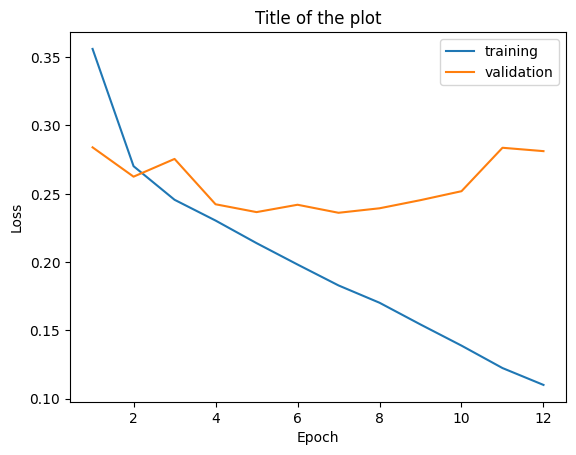

In [89]:

import matplotlib.pyplot as plt
plt.plot( x,y1, label='training')
plt.plot(x ,y2, label='validation')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Title of the plot')
plt.legend()
plt.show()




In [90]:
y1=pickle_data_lstm_bidirec_glove['data']['accuracy']
x=list(range(1,len(pickle_data_lstm_bidirec_glove['data']['accuracy'])+1))
y2=pickle_data_lstm_bidirec_glove['data']['val_accuracy']

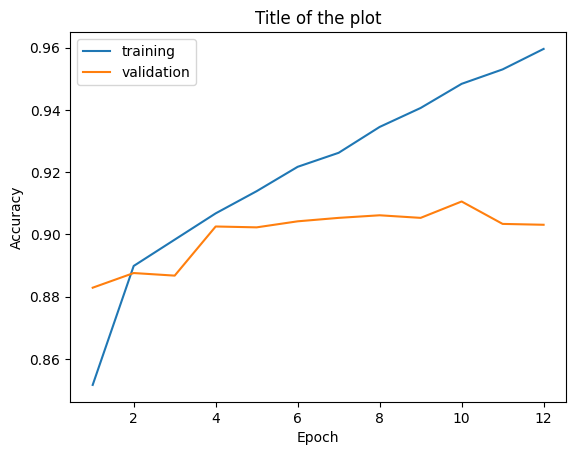

In [91]:
import matplotlib.pyplot as plt
plt.plot( x,y1, label='training')
plt.plot(x ,y2, label='validation')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Title of the plot')
plt.legend()
plt.show()




#TEXT EXTRACTION

In [92]:
!sudo apt install tesseract-ocr

'sudo' is not recognized as an internal or external command,
operable program or batch file.


In [93]:
!pip install pytesseract



[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [94]:
import pytesseract

import shutil

import os

import random

try:

    from PIL import Image

except ImportError:

    import Image

In [95]:
image_path_in_colab=r'C:\Users\admin\Desktop\Major project\testImage.png'

extractedInformation = pytesseract.image_to_string(Image.open(image_path_in_colab))



**EXTRACTED INFORMATION**

In [96]:
extractedInformation

'please feel free to go ahead and\nblock this address it will stop an\nentire country with 300 000\nregistered internet users from\nediting\n\x0c'

In [97]:

!pip install contractions


[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [98]:
import pandas as pd
import string
import contractions

def cleanData(text):
  
    return  contractions.fix(text.translate(str.maketrans('', '', string.punctuation)).replace('\n', ' ').strip()).lower()
 




In [99]:
data=cleanData(extractedInformation)
data

'please feel free to go ahead and block this address it will stop an entire country with 300 000 registered internet users from editing'

In [100]:

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts([data])
sequences = tokenizer.texts_to_sequences([data])
X = pad_sequences(sequences, maxlen=100)
X

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  2,  3,  4,
         5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
        21, 22, 23, 24]])

In [101]:
predictNormal=model_lstm_bidirec_normal.predict(X)
predictNormal

1/1 [==============================] - 0s 82ms/step


array([[0.9309366]], dtype=float32)